In [2]:
## Importacion de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [4]:
# Lectura de los archivos csv
df_flight_activity = pd.read_csv('./files/Customer Flight Activity.csv')
df_flight_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df_loyalty_history = pd.read_csv('./files/Customer Loyalty History.csv')
df_loyalty_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


- **Exploración y limpieza de datos**

In [6]:
df_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [7]:
df_loyalty_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [8]:
df_flight_activity.shape

(405624, 10)

In [9]:
df_loyalty_history.shape

(16737, 16)

In [10]:
# Verificación de duplicados en el primer dataframe
df_flight_activity.duplicated().sum()

np.int64(1864)

In [11]:
#Eliminar los duplicados    
df_flight_activity.drop_duplicates(inplace=True)

In [12]:
#Comprobación de duplicados
df_flight_activity.duplicated().sum()

np.int64(0)

In [13]:
# Verificación de duplicados en el segundo datraframe
df_loyalty_history.duplicated().sum()

np.int64(0)

In [14]:
# Verificacion de valores nulos en ambos dataframes
df_flight_activity.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [15]:
df_loyalty_history.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [16]:
# Los nulos de las columnas 'Cancellation Year' y 'Cancellation Month' se deben a que no se ha cancelado la membresía, 
# según los datos que nos da el enunciado, por lo que reemplazo los valores nulos por 0.
df_loyalty_history['Cancellation Year'] = df_loyalty_history['Cancellation Year'].fillna(0)
df_loyalty_history['Cancellation Month'] = df_loyalty_history['Cancellation Month'].fillna(0)

In [17]:
# Comprobación nulos en el segundo dataframe
df_loyalty_history.isnull().sum()

Loyalty Number           0
Country                  0
Province                 0
City                     0
Postal Code              0
Gender                   0
Education                0
Salary                4238
Marital Status           0
Loyalty Card             0
CLV                      0
Enrollment Type          0
Enrollment Year          0
Enrollment Month         0
Cancellation Year        0
Cancellation Month       0
dtype: int64

In [18]:
# Comprobación de la media y la mediana de la columna 'Salary' para ver si cuál de las dos uso para imputar los nulos
df_loyalty_history['Salary'].mean()

np.float64(79245.6094087527)

In [19]:
df_loyalty_history['Salary'].median()

np.float64(73455.0)

In [20]:
# Como la media y la mediana son muy parecidas, se puede usar cualquiera de las dos para imputar los nulos
df_loyalty_history['Salary'] = df_loyalty_history['Salary'].fillna(df_loyalty_history['Salary'].mean())

In [21]:
# Comprobación de nulos tras la imputación
df_loyalty_history.isnull().sum()   

Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

In [22]:
# Unión de ambos dataframes mediante un merge con left join, ya que quiero todos los datos del primer dataframe
df = pd.merge(df_flight_activity, df_loyalty_history, on='Loyalty Number', how='left')
df

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79245.609409,Single,Nova,2887.74,Standard,2013,3,0.0,0.0
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79245.609409,Divorced,Nova,2838.07,Standard,2016,7,0.0,0.0
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8,0.0,0.0
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79245.609409,Married,Aurora,7290.07,Standard,2014,5,0.0,0.0
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.000000,Single,Nova,8564.77,Standard,2012,8,0.0,0.0
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.000000,Married,Nova,20266.50,Standard,2017,7,0.0,0.0
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,79245.609409,Married,Star,2631.56,Standard,2018,7,0.0,0.0


In [23]:
# Guardar el dataframe limpio en un archivo csv
df.to_csv('./files/df_limpio.csv', index=False)

In [ ]:
#Comprobación de los tipos de datos, para ver si hay que cambiar alguno
df.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [28]:
# Vemos los valores unicos de todas las columnas para ver si hay valores que no corresponden con el tipo de dato que deberian tener
for column in df.columns:
    print(column)
    print(df[column].unique())
    print('-----------------------------------')

Loyalty Number
[100018 100102 100140 ... 999731 999788 999891]
-----------------------------------
Year
[2017 2018]
-----------------------------------
Month
[ 1  9  2  3 11  4  5  7  6  8 10 12]
-----------------------------------
Flights Booked
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
-----------------------------------
Flights with Companions
[ 0  4  7  1  6  3  5  2 10  8  9 11]
-----------------------------------
Total Flights
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
-----------------------------------
Distance
[1521 2030 1200 ... 1217  617 4135]
-----------------------------------
Points Accumulated
[152.   203.   120.   ...  18.75 601.   626.  ]
-----------------------------------
Points Redeemed
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 

In [29]:
# Cambio del tipo de dato de las columnas 'Cancellation Year' y 'Cancellation Month' a int
df['Cancellation Year'] = df['Cancellation Year'].astype(int)
df['Cancellation Month'] = df['Cancellation Month'].astype(int)

In [30]:
# Comprobación de los cambios
df.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                int64
Cancellation Month               int64
dtype: object

In [33]:
#comprobar si quedan nulos
df.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64

In [37]:
#Guardar el dataframe con los cambios
df.to_csv('./files/df_limpio.csv', index=False)

- **Visualización**

1.  ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

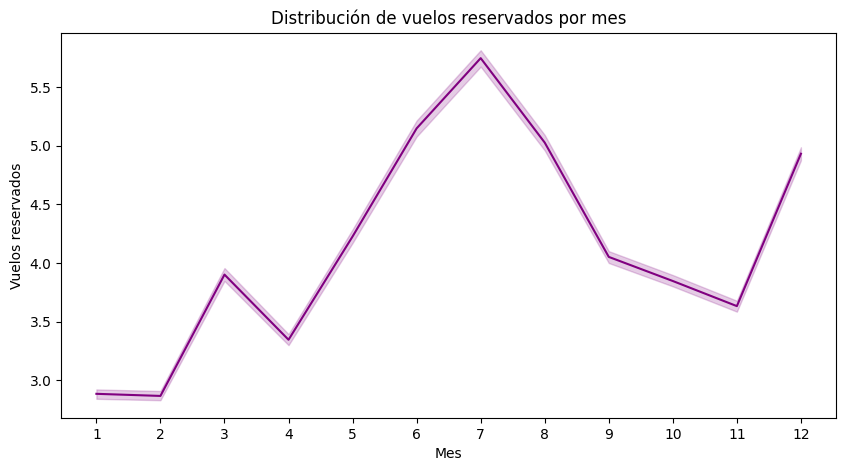

In [50]:
# Realización de un lineplot para ver la distribución de los vuelos por mes
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Flights Booked", data=df, color="purple")
plt.xticks(range(1, 13))  # Para que se muestren todos lo meses en el eje x, numerados del 1-12
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados")
plt.title("Distribución de vuelos reservados por mes");

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

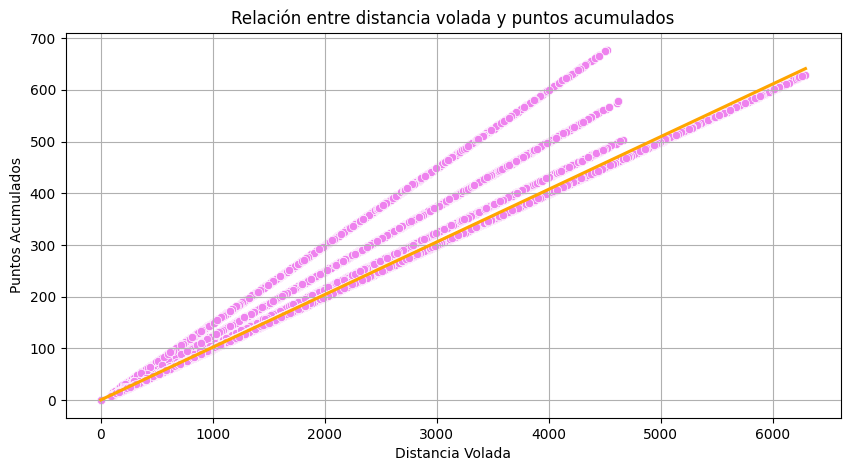

In [57]:
# Realización de un gráfico de dispersión con la línea de regresión para que sea fácil leerlo
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Distance", y="Points Accumulated", data=df, color="violet")
sns.regplot(x="Distance", y="Points Accumulated", data=df, scatter=False, color="orange")  # Línea de regresión
plt.xlabel("Distancia Volada")
plt.ylabel("Puntos Acumulados")
plt.title("Relación entre distancia volada y puntos acumulados")
plt.grid(True);


Se puede determinar una relación directa entre la distancia y los puntos acumulados, a mayor distancia volada más puntos acumulados.

3. ¿Cuál es la distribución de los clientes por provincia o estado?


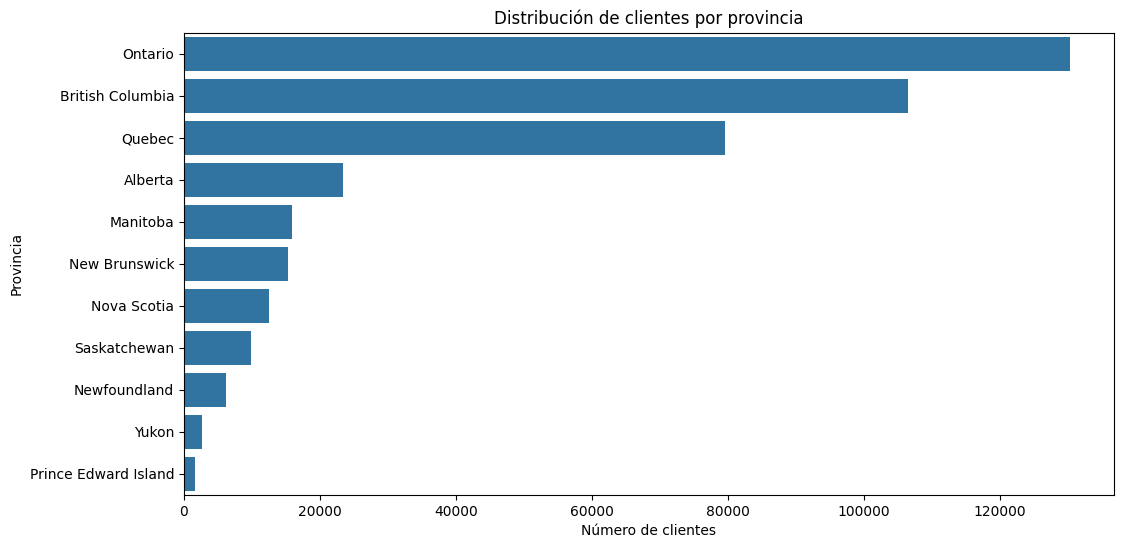

In [75]:
# Primero contamos los clientes por provincia
clientes_provincia = df["Province"].value_counts().reset_index()
clientes_provincia.columns = ["Province", "Número de clientes"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Número de clientes", y="Province", data=clientes_provincia)
plt.xlabel("Número de clientes")
plt.ylabel("Provincia")
plt.title("Distribución de clientes por provincia");

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [64]:
# Primero calculo la media del salario por nivel educativo
salary_education = df.groupby("Education")["Salary"].mean().reset_index()
salary_education

,Education,Salary
0,Bachelor,72473.471154
1,College,79245.609409
2,Doctor,178403.675202
3,High School or Below,61019.926143
4,Master,103734.523724


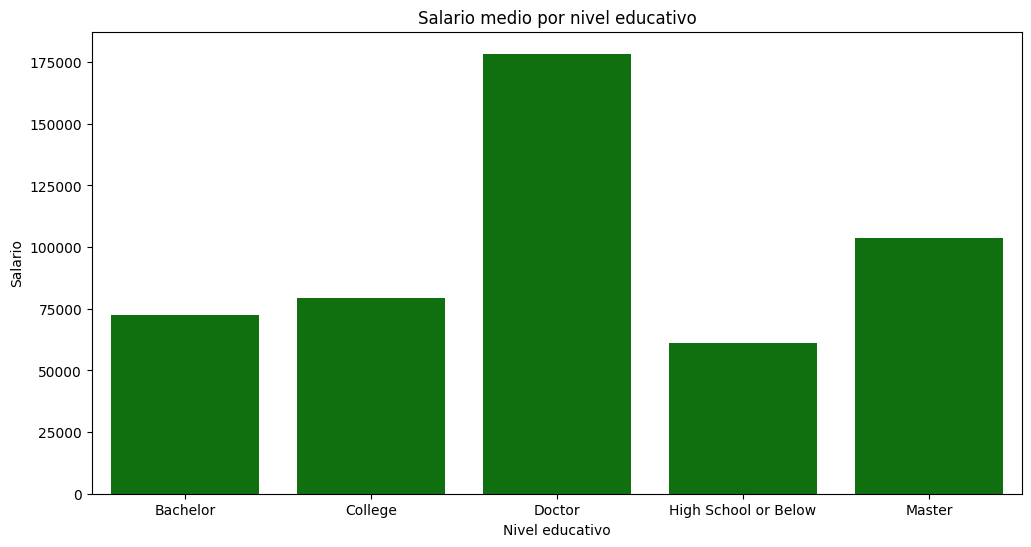

In [69]:
# Realizo el gráfico de barras (barplot)
plt.figure(figsize=(12, 6))
sns.barplot(y="Salary", x="Education", data=salary_education, color="green")
plt.ylabel("Salario")
plt.xlabel("Nivel educativo")
plt.title("Salario medio por nivel educativo");

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

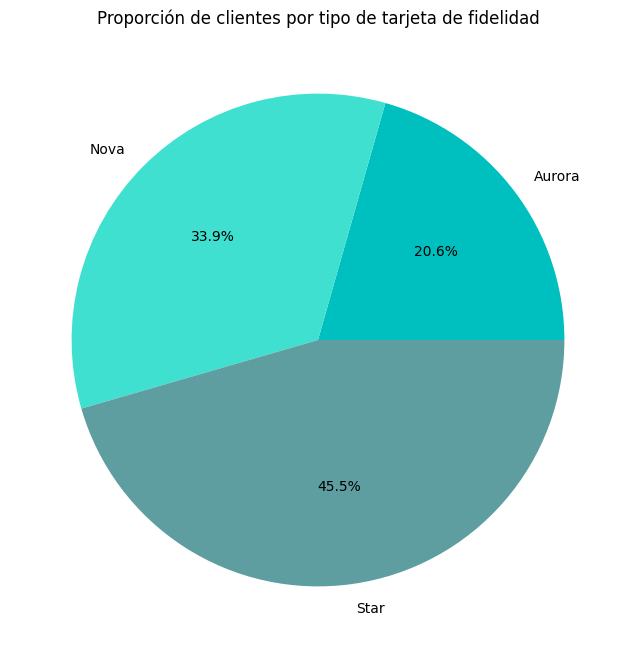

In [80]:
# Preparación de los datos para el gráfico
loyalty_card_counts = df.groupby("Loyalty Card")["Loyalty Number"].count().reset_index()
# Lista de colores para la representación gráfica
colores = ['c','turquoise','cadetblue']
# Realización del pieplot con los datos anteriores
plt.figure(figsize=(8, 8))
plt.pie(loyalty_card_counts["Loyalty Number"], labels=loyalty_card_counts["Loyalty Card"], autopct='%1.1f%%', colors=colores)
plt.title("Proporción de clientes por tipo de tarjeta de fidelidad");



6. ¿Cómo se distribuyen los clientes según su estado civil y género?

''

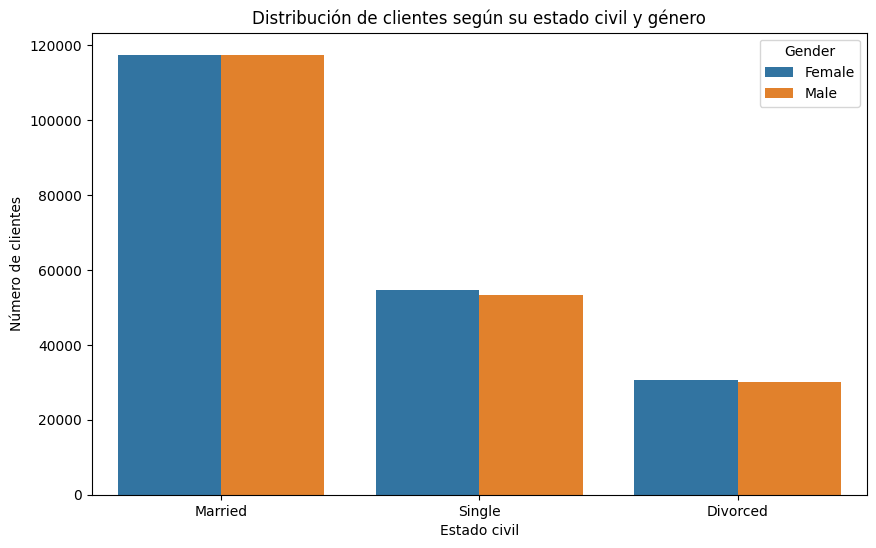

In [ ]:
#Uso de un countplot para ver la distribución de los clientes según su estado civil y género
plt.figure(figsize=(10, 6))
sns.countplot(x="Marital Status", hue="Gender", data=df)
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.title("Distribución de clientes según su estado civil y género");
